# Problem Statement:🎥🍿

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

# Data Description:

### Data Description:

###### MOVIES FILE DESCRIPTION

================================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

    - Titles are identical to titles provided by the IMDB (including year of release)
    - Genres are pipe-separated and are selected from the following genres:

    . Action
    . Adventure
    . Animation
    . Children's
    . Comedy
    . Crime
    . Documentary
    . Drama
    . Fantasy
    . Film-Noir
    . Horror
    . Musical
    . Mystery
    . Romance
    . Sci-Fi
    . Thriller
    . War
    . Western

###### RATINGS FILE DESCRIPTION

================================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

    . UserIDs range between 1 and 6040
    . MovieIDs range between 1 and 3952
    . Ratings are made on a 5-star scale (whole-star ratings only)
    . Timestamp is represented in seconds
    . Each user has at least 20 ratings

###### USERS FILE DESCRIPTION

================================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

    . Gender is denoted by a "M" for male and "F" for female
    . Age is chosen from the following ranges:

        . 1: "Under 18"
        . 18: "18-24"
        . 25: "25-34"
        . 35: "35-44"
        . 45: "45-49"
        . 50: "50-55"
        . 56: "56+"
    . Occupation is chosen from the following choices:

        . 0: "other" or not specified
        . 1: "academic/educator"
        . 2: "artist"
        . 3: "clerical/admin"
        . 4: "college/grad student"
        . 5: "customer service"
        . 6: "doctor/health care"
        . 7: "executive/managerial"
        . 8: "farmer"
        . 9: "homemaker"
        . 10: "K-12 student"
        . 11: "lawyer"
        . 12: "programmer"
        . 13: "retired"
        . 14: "sales/marketing"
        . 15: "scientist"
        . 16: "self-employed"
        . 17: "technician/engineer"
        . 18: "tradesman/craftsman"
        . 19: "unemployed"
        . 20: "writer"

##### Our Approach:

In this project, we'll be building a recommender system that is going to recommend movies to a user based on their preferences as well as the choices of other users who are similar to them.

##### What is a Recommender System?

A recommender engine, or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

##### Types of Recommender Systems -

Recommender systems usually make use of either or both Collaborative Filtering and Content-based Filtering techniques.

##### Collaborative Filtering

Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items. By locating peer users/items with a rating history similar to the current user or item, they generate recommendations using this neighborhood.

##### Content-based Filtering

Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.

# 1. Import Libraries

In [1]:
# !pip install cmfrec

  Using cached cmfrec-3.5.1.post8.tar.gz (268 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached findblas-0.1.23-py3-none-any.whl
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
Failed to build cmfrec


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [14 lines of output]
  C:\Users\PARTHA\AppData\Local\Temp\pip-build-env-vjdxcb1k\overlay\Lib\site-packages\setuptools\dist.py:314: InformationOnly: Normalizing '3.5.1-8' to '3.5.1.post8'
    self.metadata.version = self._normalize_version(self.metadata.version)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cmfrec
  copying cmfrec\__init__.py -> build\lib.win-amd64-cpython-310\cmfrec
  running build_ext
  Compiling cmfrec/cfuns_double_plusblas.pyx because it changed.
  [1/1] Cythonizing cmfrec/cfuns_double_plusblas.pyx
  building 'cmfrec.wrapper_double' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict 
from scipy import sparse
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [3]:
# from cmfrec import CMF

# 2. Set Options

In [4]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 3. Read Data & Data Formatting

#### 3.1 Movies

In [5]:
movies = pd.read_fwf('E:\\1.SCALER\\Classes\\BusinessCase Studies\\13.Zee_Recommender_Systems\\zee-movies.dat',encoding='ISO-8859-1',header=None)

In [6]:
movies.shape

(3884, 3)

In [7]:
movies.head()

0    1    2
0                           Movie ID::Title::Genres  NaN  NaN
1  1::Toy Story (1995)::Animation|Children's|Comedy  NaN  NaN
2   2::Jumanji (1995)::Adventure|Children's|Fantasy  NaN  NaN
3        3::Grumpier Old Men (1995)::Comedy|Romance  NaN  NaN
4         4::Waiting to Exhale (1995)::Comedy|Drama  NaN  NaN

In [8]:
movies.columns

Int64Index([0, 1, 2], dtype='int64')

In [9]:
movies.drop(columns=[1,2],axis=1,inplace=True)

In [10]:
movies.head()

0
0                           Movie ID::Title::Genres
1  1::Toy Story (1995)::Animation|Children's|Comedy
2   2::Jumanji (1995)::Adventure|Children's|Fantasy
3        3::Grumpier Old Men (1995)::Comedy|Romance
4         4::Waiting to Exhale (1995)::Comedy|Drama

In [11]:
movies.columns = ['Movie ID::Title::Genres']

In [12]:
movies.head()

Movie ID::Title::Genres
0                           Movie ID::Title::Genres
1  1::Toy Story (1995)::Animation|Children's|Comedy
2   2::Jumanji (1995)::Adventure|Children's|Fantasy
3        3::Grumpier Old Men (1995)::Comedy|Romance
4         4::Waiting to Exhale (1995)::Comedy|Drama

In [13]:
delimiter = '::'
movies = movies['Movie ID::Title::Genres'].str.split(delimiter,expand=True)
movies.columns = ['Movie ID', 'Title', 'Genres']

In [14]:
movies.rename(columns={'Movie ID':'MovieID'},inplace=True)
movies1=movies.copy()
movies.head()

MovieID                     Title                        Genres
0  Movie ID                     Title                        Genres
1         1          Toy Story (1995)   Animation|Children's|Comedy
2         2            Jumanji (1995)  Adventure|Children's|Fantasy
3         3   Grumpier Old Men (1995)                Comedy|Romance
4         4  Waiting to Exhale (1995)                  Comedy|Drama

#### 3.2 Ratings

In [15]:
ratings = pd.read_fwf('E:\\1.SCALER\\Classes\\BusinessCase Studies\\13.Zee_Recommender_Systems\\zee-ratings.dat',encoding='ISO-8859-1',header=None)

In [16]:
ratings.shape

(1000210, 1)

In [17]:
ratings.head()

0
0  UserID::MovieID::Rating::Timestamp
1               1::1193::5::978300760
2                1::661::3::978302109
3                1::914::3::978301968
4               1::3408::4::978300275

In [18]:
ratings.columns = ['UserID::MovieID::Rating::Timestamp']

In [19]:
ratings.head()

UserID::MovieID::Rating::Timestamp
0  UserID::MovieID::Rating::Timestamp
1               1::1193::5::978300760
2                1::661::3::978302109
3                1::914::3::978301968
4               1::3408::4::978300275

In [20]:
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimiter,expand=True)
ratings.columns = ['UserID','MovieID', 'Rating', 'Timestamp']

In [21]:
ratings.shape

(1000210, 4)

In [22]:
ratings1=ratings.copy()
ratings.head()

UserID  MovieID  Rating  Timestamp
0  UserID  MovieID  Rating  Timestamp
1       1     1193       5  978300760
2       1      661       3  978302109
3       1      914       3  978301968
4       1     3408       4  978300275

#### 3.3 Users

In [23]:
users = pd.read_fwf('E:\\1.SCALER\\Classes\\BusinessCase Studies\\13.Zee_Recommender_Systems\\zee-users.dat',encoding='ISO-8859-1',header=None)

In [24]:
users.columns = ['UserID::Gender::Age::Occupation::Zip-code']

In [25]:
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimiter, expand=True)
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users1=users.copy()

In [26]:
users.replace({'Age':{'1':  "Under 18",
                      '18':  "18-24",
                      '25':  "25-34",
                      '35':  "35-44",
                      '45':  "45-49",
                      '50':  "50-55",
                      '56':  "56 Above"}}, inplace=True)

In [27]:
users.replace({'Occupation':{'0': "other",
                             '1': "academic/educator",
                             '2': "artist",
                             '3': "clerical/admin",
                             '4': "college/grad student",
                             '5': "customer service",
                             '6': "doctor/health care",
                             '7': "executive/managerial",
                             '8': "farmer",
                             '9': "homemaker",
                             '10': "k-12 student",
                             '11': "lawyer",
                             '12': "programmer",
                             '13': "retired",
                             '14': "sales/marketing",
                             '15': "scientist",
                             '16': "self-employed",
                             '17': "technician/engineer",
                             '18': "tradesman/craftsman",
                             '19': "unemployed",
                             '20': "writer"}}, inplace=True)

In [28]:
users.shape

(6041, 5)

In [29]:
users.head()

UserID  Gender       Age            Occupation  Zip-code
0  UserID  Gender       Age            Occupation  Zip-code
1       1       F  Under 18          k-12 student     48067
2       2       M  56 Above         self-employed     70072
3       3       M     25-34             scientist     55117
4       4       M     45-49  executive/managerial     02460

# 4. Exploratory Data Analysis

## 4.1 Preparing the Dataset

In [30]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['Year'] = movies.Title.str.extract('(\(\d\d\d\d\))',expand=False)

#Removing the parentheses
movies['Year'] = movies.Year.str.extract('(\d\d\d\d)',expand=False)

#Removing the years from the 'Title' column
movies['Title'] = movies.Title.str.replace('(\(\d\d\d\d\))', '')

#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['Title'] = movies['Title'].apply(lambda x : x.strip())
movies.head()

MovieID              Title                        Genres  Year
0  Movie ID              Title                        Genres   NaN
1         1          Toy Story   Animation|Children's|Comedy  1995
2         2            Jumanji  Adventure|Children's|Fantasy  1995
3         3   Grumpier Old Men                Comedy|Romance  1995
4         4  Waiting to Exhale                  Comedy|Drama  1995

In [31]:
dfmov = movies.copy()
dfmov.dropna(inplace=True)
dfmov.Genres = dfmov.Genres.str.split('|')
dfmov['Genres'] = dfmov['Genres'].apply(lambda x: [i for i in x if i!='A' and i!='D' and i!= 'F' and i!='C' and i!='M' and i!= 'W' and i!= ' '])

for i  in dfmov['Genres']:
    for j in range(len(i)):
        if i[j] == 'Ro' or i[j] == 'Rom' or i[j] == 'Roman' or i[j] == 'R' or i[j] == 'Roma':
            i[j] = 'Romance'
        elif i[j] == 'Chil' or i[j] == 'Childre' or i[j] == 'Childr' or i[j] == "Children'" or i[j] =='Children' or i[j] =='Chi':
            i[j] = "Children's"
        elif i[j] == 'Fantas' or i[j] == 'Fant':
            i[j] = 'Fantasy'
        elif i[j] == 'Dr' or i[j] == 'Dram':
            i[j] = 'Drama'
        elif i[j] == 'Documenta'or i[j] == 'Docu' or i[j] == 'Document' or i[j] == 'Documen':
            i[j] = 'Documentary'
        elif i[j] == 'Wester'or i[j] == 'We':
            i[j] = 'Western'
        elif i[j] == 'Animati':
            i[j] = 'Animation'
        elif i[j] == 'Come'or i[j] == 'Comed' or i[j] == 'Com':
            i[j] = 'Comedy'
        elif i[j] == 'Sci-F'or i[j] == 'S' or i[j] == 'Sci-' or i[j] == 'Sci':
            i[j] = 'Sci-Fi'
        elif i[j] == 'Adv'or i[j] == 'Adventu' or i[j] == 'Adventur' or i[j] == 'Advent':
            i[j] = 'Adventure'
        elif i[j] == 'Horro'or i[j] == 'Horr':
            i[j] = 'Horror'
        elif i[j] == 'Th'or i[j] == 'Thri' or i[j] == 'Thrille':
            i[j] = 'Thriller'
        elif i[j] == 'Acti':
            i[j] = 'Action'
        elif i[j] == 'Wa':
            i[j] = 'War'
        elif i[j] == 'Music':
            i[j] = 'Musical'

In [32]:
dfmov.head()

MovieID                        Title                            Genres  Year
1       1                    Toy Story   [Animation, Children's, Comedy]  1995
2       2                      Jumanji  [Adventure, Children's, Fantasy]  1995
3       3             Grumpier Old Men                 [Comedy, Romance]  1995
4       4            Waiting to Exhale                   [Comedy, Drama]  1995
5       5  Father of the Bride Part II                          [Comedy]  1995

#### 4.1.1 Merge all above dataframes

In [33]:
df_1 = pd.merge(dfmov,ratings,how='inner',on='MovieID')
df_1.head()

MovieID      Title                           Genres  Year UserID Rating  \
0       1  Toy Story  [Animation, Children's, Comedy]  1995      1      5   
1       1  Toy Story  [Animation, Children's, Comedy]  1995      6      4   
2       1  Toy Story  [Animation, Children's, Comedy]  1995      8      4   
3       1  Toy Story  [Animation, Children's, Comedy]  1995      9      5   
4       1  Toy Story  [Animation, Children's, Comedy]  1995     10      5   

   Timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474

In [34]:
data = pd.merge(df_1,users,how='inner',on='UserID')
data.head()

MovieID                               Title  \
0       1                           Toy Story   
1      48                          Pocahontas   
2     150                           Apollo 13   
3     260  Star Wars: Episode IV - A New Hope   
4     527                    Schindler's List   

                                      Genres  Year UserID Rating  Timestamp  \
0            [Animation, Children's, Comedy]  1995      1      5  978824268   
1  [Animation, Children's, Musical, Romance]  1995      1      5  978824351   
2                                    [Drama]  1995      1      5  978301777   
3               [Action, Adventure, Fantasy]  1977      1      4  978300760   
4                               [Drama, War]  1993      1      5  978824195   

  Gender       Age    Occupation Zip-code  
0      F  Under 18  k-12 student    48067  
1      F  Under 18  k-12 student    48067  
2      F  Under 18  k-12 student    48067  
3      F  Under 18  k-12 student    48067  
4      F  Under 18  k-12 student    48067

##### Shape of the dataset

In [35]:
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  996144
No. of columns:  11


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 996143
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     996144 non-null  object
 1   Title       996144 non-null  object
 2   Genres      996144 non-null  object
 3   Year        996144 non-null  object
 4   UserID      996144 non-null  object
 5   Rating      996144 non-null  object
 6   Timestamp   996144 non-null  object
 7   Gender      996144 non-null  object
 8   Age         996144 non-null  object
 9   Occupation  996144 non-null  object
 10  Zip-code    996144 non-null  object
dtypes: object(11)
memory usage: 91.2+ MB


In this dataset we have 11 object columns

#### 4.1.2 Missing Values

In [37]:
missing_value = pd.DataFrame({
    'Missing Value' : data.isnull().sum(),
    'Percentage' : (data.isnull().sum()/len(data))*100
})

In [38]:
missing_value.sort_values(by='Percentage',ascending=False)

Missing Value  Percentage
MovieID                 0        0.00
Title                   0        0.00
Genres                  0        0.00
Year                    0        0.00
UserID                  0        0.00
Rating                  0        0.00
Timestamp               0        0.00
Gender                  0        0.00
Age                     0        0.00
Occupation              0        0.00
Zip-code                0        0.00

We have no missing values in the dataset

#### 4.1.3 Feature Engineering

In [39]:
data.columns

Index(['MovieID', 'Title', 'Genres', 'Year', 'UserID', 'Rating', 'Timestamp',
       'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [40]:
#Change the datatype from object to date_time
data['Datatime'] = pd.to_datetime(data['Timestamp'], unit='s')

#Change the datatype from object to Integer
data['Year'] = data['Year'].astype('int32')

#Change the datatype from object to Integer
data['Rating']=data['Rating'].astype('int32')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 996143
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     996144 non-null  object        
 1   Title       996144 non-null  object        
 2   Genres      996144 non-null  object        
 3   Year        996144 non-null  int32         
 4   UserID      996144 non-null  object        
 5   Rating      996144 non-null  int32         
 6   Timestamp   996144 non-null  object        
 7   Gender      996144 non-null  object        
 8   Age         996144 non-null  object        
 9   Occupation  996144 non-null  object        
 10  Zip-code    996144 non-null  object        
 11  Datatime    996144 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(9)
memory usage: 91.2+ MB


In the data we have 1 datetime, 2 integer and 9 object data type columns

In [42]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
data['ReleaseDec'] = pd.cut(data['Year'], bins=bins, labels=labels)

In [43]:
data.head()

MovieID                               Title  \
0       1                           Toy Story   
1      48                          Pocahontas   
2     150                           Apollo 13   
3     260  Star Wars: Episode IV - A New Hope   
4     527                    Schindler's List   

                                      Genres  Year UserID  Rating  Timestamp  \
0            [Animation, Children's, Comedy]  1995      1       5  978824268   
1  [Animation, Children's, Musical, Romance]  1995      1       5  978824351   
2                                    [Drama]  1995      1       5  978301777   
3               [Action, Adventure, Fantasy]  1977      1       4  978300760   
4                               [Drama, War]  1993      1       5  978824195   

  Gender       Age    Occupation Zip-code            Datatime ReleaseDec  
0      F  Under 18  k-12 student    48067 2001-01-06 23:37:48        90s  
1      F  Under 18  k-12 student    48067 2001-01-06 23:39:11        90s  
2      F  Under 18  k-12 student    48067 2000-12-31 22:29:37        90s  
3      F  Under 18  k-12 student    48067 2000-12-31 22:12:40        70s  
4      F  Under 18  k-12 student    48067 2001-01-06 23:36:35        90s

## 4.2 Understanding the Dataset

#### 4.2.1 Analyse Features

#### Average User Ratings

In [44]:
user_ratings = data[['UserID','Rating']].groupby('UserID').mean()

Text(0, 0.5, 'Frequency')

<Figure size 576x576 with 0 Axes>

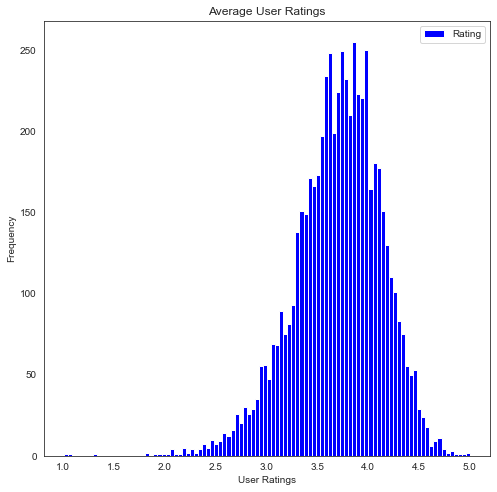

In [45]:
fig = plt.figure(figsize = (8,8))
user_ratings.plot(kind = 'hist', bins = 100, figsize = (8,8), color = 'blue')
plt.plot()
plt.xlabel('User Ratings')
plt.title('Average User Ratings')
plt.ylabel('Frequency')

From above plot, we can see that on average, users are rating movies 3.5-4 more frequently than any other rating. This makes sense since people are less inclined to rate movies lower than a 3 if they didn't enjoy the movie.

No. of movies by Release year.

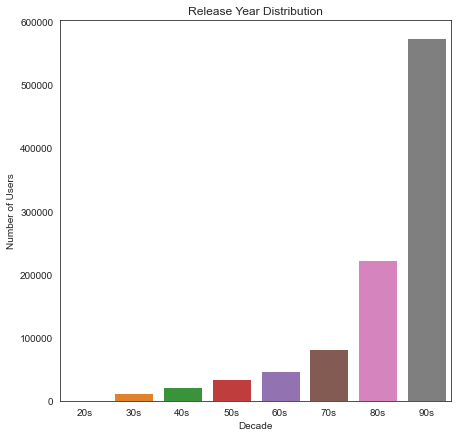

In [46]:
plt.figure(figsize=(7, 7))
sns.countplot(x='ReleaseDec', data=data)
plt.title('Release Year Distribution')
plt.xlabel('Decade')
plt.ylabel('Number of Users')
plt.show()

From the above plot we can infer most of the movies present in the dataset were released in the year 90s

Top 10 Genres based on movies count

In [47]:
genres_df = pd.get_dummies(dfmov['Genres'].apply(pd.Series).stack()).sum(level=0)
genres_df.head()

Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
1  0       0          0          1           1       1      0            0   
2  0       0          1          0           1       0      0            0   
3  0       0          0          0           0       1      0            0   
4  0       0          0          0           0       1      0            0   
5  0       0          0          0           0       1      0            0   

   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
1      0        0          0       0        0        0        0       0   
2      0        1          0       0        0        0        0       0   
3      0        0          0       0        0        0        1       0   
4      1        0          0       0        0        0        0       0   
5      0        0          0       0        0        0        0       0   

   Thriller  War  Western  
1         0    0        0  
2         0    0        0  
3         0    0        0  
4         0    0        0  
5         0    0        0

In [48]:
### considering only the genre columns for the test
test = genres_df.iloc[:,0:].sum()
test=test.iloc[1:]
print(test)

Action          501
Adventure       282
Animation       104
Children's      249
Comedy         1189
Crime           210
Documentary     124
Drama          1582
Fantasy          62
Film-Noir        44
Horror          340
Musical         113
Mystery         105
Romance         462
Sci-Fi          265
Thriller        488
War             139
Western          68
dtype: int64


In [49]:
len(test)

18

In [50]:
print(type(pd.to_numeric(test)))
print(type(test.to_numpy().reshape(18,)[0]))
# genre_sum = np.hstack((np.asarray(genre_list).reshape(18,1), test.to_numpy().reshape(18,)))
# genre_sum[:,1] = genre_sum[:,1].astype('int64')
test2 = test.to_numpy().reshape(18,)

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


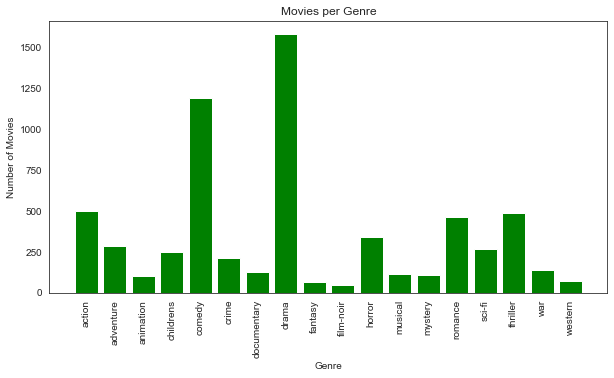

In [51]:
genre_list=['action', 'adventure','animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama','fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi','thriller', 'war', 'western']
x = np.arange(18)
plt.figure(figsize = (10,5))
plt.bar(x, test2, color = 'g')
plt.xticks(x, genre_list, rotation = 'vertical')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movies per Genre')
sns.set(font_scale=1.5)
plt.show()

From the above plot we can infer that most the movies in the dataset belongs to Comedy and Drama genres.

#### Distribution by Age -

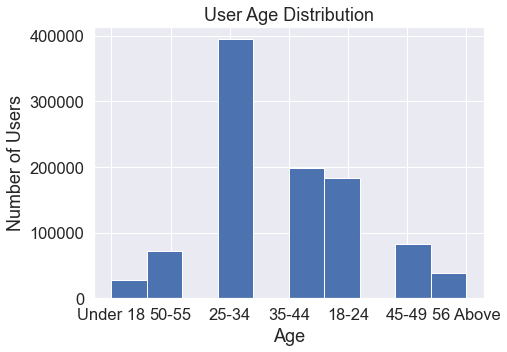

In [52]:
data['Age'].hist(figsize=(7, 5))
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

From the above plot we can infer that 25-34 age group have watched and rated the most number of movies

#### Distribution by Gender -

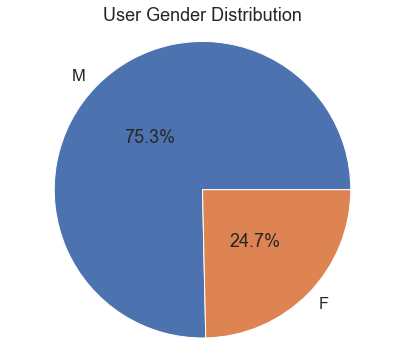

In [53]:
x = data['Gender'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=['M','F'], autopct='%1.1f%%', pctdistance=0.5)
plt.title('User Gender Distribution')
plt.axis('equal')
plt.show()

From the above plot most of the users in our dataset who’ve rated the movies are Male.

#### Distribution by Occupation -

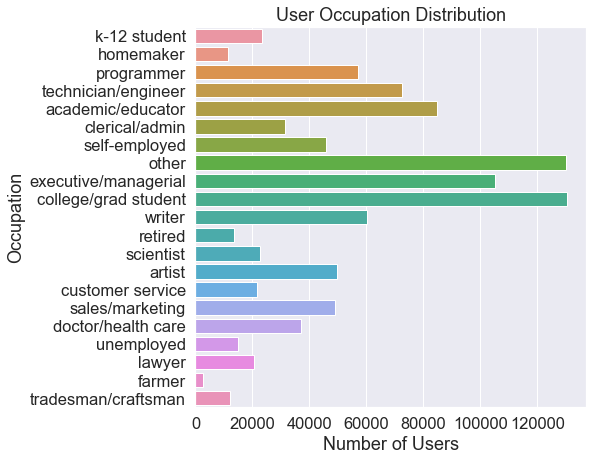

In [54]:
plt.figure(figsize=(7, 7))
sns.countplot(y='Occupation', data=data)
plt.title('User Occupation Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()

From the above plot users belonging to college/grad student profession have watched and rated the most movies.

In [55]:
movies_rating_count = data.groupby(by=['Title'])['Rating'].count().reset_index()[['Title','Rating']]
movies_rating_count.rename(columns = {'Rating' : 'totalRatingCount'},inplace=True)
movies_rating_count.head()

Title  totalRatingCount
0         $1,000,000 Duck                37
1           'Night Mother                70
2      'Til There Was You                52
3             'burbs, The               303
4  ...And Justice for All               199

In [56]:
top10_movies=movies_rating_count[['Title','totalRatingCount']].sort_values(by='totalRatingCount',ascending=False).head(10)
top10_movies

Title  totalRatingCount
125                                  American Beauty              3428
3099              Star Wars: Episode IV - A New Hope              2991
3100  Star Wars: Episode V - The Empire Strikes Back              2990
3101      Star Wars: Episode VI - Return of the Jedi              2883
1761                                   Jurassic Park              2672
2843                             Saving Private Ryan              2653
3238                      Terminator 2: Judgment Day              2649
2075                                     Matrix, The              2590
256                               Back to the Future              2583
2936                       Silence of the Lambs, The              2578

Text(0, 0.5, 'User Rating count')

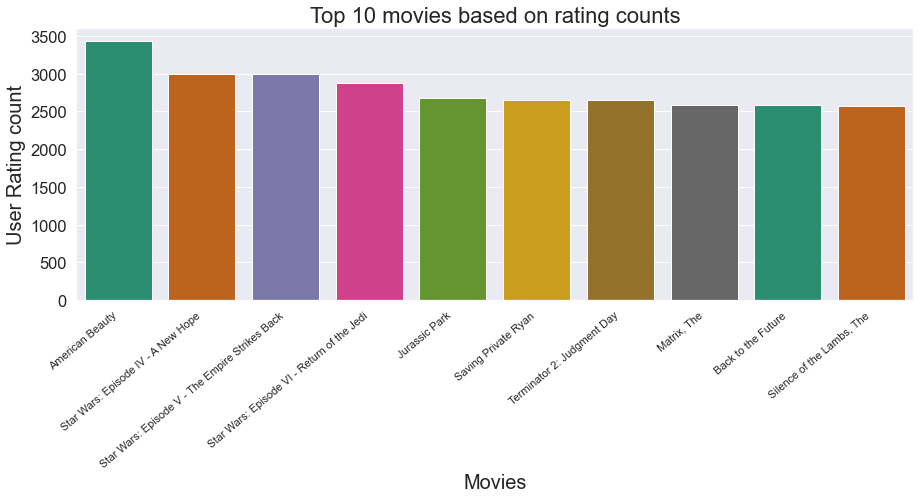

In [57]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x="Title", y="totalRatingCount", data=top10_movies, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 movies based on rating counts',fontsize = 22)
ax.set_xlabel('Movies',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

From the above plot, the movie with maximum number of ratings is American Beauty

# 5. Recommendations systems

#### User-Interaction Matrix

Creating a pivot table of movie titles and userid and ratings are taken as values.

In [58]:
matrix = pd.pivot_table(data,index='UserID',columns='Title',values='Rating',aggfunc='mean')

# Imputing 'NaN' values with Zero rating 
matrix.fillna(0,inplace=True)
matrix.shape

(6040, 3640)

In [59]:
matrix.head(10)

Title   $1,000,000 Duck  'Night Mother  'Til There Was You  'burbs, The  \
UserID                                                                    
1                  0.00           0.00                0.00         0.00   
10                 0.00           0.00                0.00         4.00   
100                0.00           0.00                0.00         0.00   
1000               0.00           0.00                0.00         0.00   
1001               0.00           0.00                0.00         0.00   
1002               0.00           0.00                0.00         0.00   
1003               0.00           0.00                0.00         0.00   
1004               0.00           0.00                0.00         0.00   
1005               0.00           0.00                0.00         0.00   
1006               0.00           0.00                0.00         0.00   

Title   ...And Justice for All  1-900  10 Things I Hate About You  \
UserID                                                              
1                         0.00   0.00                        0.00   
10                        0.00   0.00                        0.00   
100                       0.00   0.00                        0.00   
1000                      0.00   0.00                        0.00   
1001                      0.00   0.00                        0.00   
1002                      0.00   0.00                        0.00   
1003                      0.00   0.00                        0.00   
1004                      0.00   0.00                        0.00   
1005                      0.00   0.00                        0.00   
1006                      0.00   0.00                        0.00   

Title   101 Dalmatians  12 Angry Men  13th Warrior, The  187  \
UserID                                                         
1                 0.00          0.00               0.00 0.00   
10                0.00          3.00               4.00 0.00   
100               0.00          0.00               0.00 0.00   
1000              4.00          0.00               0.00 0.00   
1001              3.00          0.00               0.00 0.00   
1002              0.00          0.00               0.00 0.00   
1003              0.00          0.00               0.00 0.00   
1004              4.00          0.00               0.00 0.00   
1005              0.00          0.00               0.00 0.00   
1006              0.00          0.00               0.00 0.00   

Title   2 Days in the Valley  20 Dates  20,000 Leagues Under the Sea  \
UserID                                                                 
1                       0.00      0.00                          0.00   
10                      0.00      0.00                          4.00   
100                     0.00      0.00                          0.00   
1000                    0.00      0.00                          0.00   
1001                    0.00      0.00                          0.00   
1002                    0.00      0.00                          0.00   
1003                    0.00      0.00                          0.00   
1004                    0.00      0.00                          0.00   
1005                    0.00      0.00                          0.00   
1006                    0.00      0.00                          0.00   

Title   200 Cigarettes  2001: A Space Odyssey  2010  24 7: Twenty Four Seven  \
UserID                                                                         
1                 0.00                   0.00  0.00                     0.00   
10                0.00                   3.00  0.00                     0.00   
100               0.00                   4.00  0.00                     0.00   
1000              0.00                   0.00  0.00                     0.00   
1001              1.00                   0.00  0.00                     0.00   
1002              0.00                   0.00  0.00                     0.00

In [60]:
# Checking data sparsity
n_users = data['UserID'].nunique()
n_movies = data['MovieID'].nunique()
sparsity = round(1.0 - data.shape[0] / float( n_users * n_movies), 3)
print('The sparsity level of dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of dataset is 95.5%


## 5.1 Pearson Correlation

Correlation is a measure that tells how closely two variables move in the same or opposite direction. A positive value indicates that they move in the same direction (i.e. if one increases other increases), where as a negative value indicates the opposite.

The most popular correlation measure for numerical data is Pearson’s Correlation. This measures the degree of linear relationship between two numeric variables and lies between -1 to +1. It is represented by ‘r’.

    . r=1 means perfect positive correlation
    . r=-1 means perfect negative correlation
    . r=0 means no linear correlation (note, it does not mean no correlation)

##### Item - Based approach

We will take a movie name as an input from the user and see which other 5 (five) movies have maximum correlation with it.

In [61]:
data[data['Title']=='Home Alone']

MovieID       Title                Genres  Year UserID  Rating  \
415        586  Home Alone  [Children's, Comedy]  1990     10       3   
822        586  Home Alone  [Children's, Comedy]  1990     18       4   
1742       586  Home Alone  [Children's, Comedy]  1990     26       2   
2705       586  Home Alone  [Children's, Comedy]  1990     38       4   
3015       586  Home Alone  [Children's, Comedy]  1990     45       3   
...        ...         ...                   ...   ...    ...     ...   
975134     586  Home Alone  [Children's, Comedy]  1990   4273       5   
977745     586  Home Alone  [Children's, Comedy]  1990   3385       3   
981262     586  Home Alone  [Children's, Comedy]  1990   3633       4   
990597     586  Home Alone  [Children's, Comedy]  1990   4846       3   
992086     586  Home Alone  [Children's, Comedy]  1990   5117       1   

        Timestamp Gender    Age            Occupation Zip-code  \
415     978228747      F  35-44     academic/educator    95370   
822     978155233      F  18-24        clerical/admin    95825   
1742    978140049      M  25-34  executive/managerial    23112   
2705    978046369      F  18-24  college/grad student    02215   
3015    977991192      F  45-49         self-employed    94110   
...           ...    ...    ...                   ...      ...   
975134  989118624      M  45-49               retired    30030   
977745  967564715      F  25-34             homemaker    32212   
981262  966526025      M  35-44   tradesman/craftsman    60441   
990597  962834091      F  25-34                artist    90066   
992086  962300984      F  25-34                 other    70118   

                  Datatime ReleaseDec  
415    2000-12-31 02:12:27        90s  
822    2000-12-30 05:47:13        90s  
1742   2000-12-30 01:34:09        90s  
2705   2000-12-28 23:32:49        90s  
3015   2000-12-28 08:13:12        90s  
...                    ...        ...  
975134 2001-05-06 03:10:24        90s  
977745 2000-08-29 15:58:35        90s  
981262 2000-08-17 15:27:05        90s  
990597 2000-07-05 21:54:51        90s  
992086 2000-06-29 17:49:44        90s  

[675 rows x 13 columns]

In [62]:
#movie_name = input("Enter a movie name: ")
movie_name = 'Home Alone'
# Taking the ratings of that movie
movie_rating = matrix[movie_name]
movie_rating

UserID
1      0.00
10     3.00
100    0.00
1000   0.00
1001   0.00
       ... 
995    0.00
996    0.00
997    0.00
998    0.00
999    0.00
Name: Home Alone, Length: 6040, dtype: float64

In [63]:
similar_movies = matrix.corrwith(movie_rating)
#Finding similar movies

sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
# Sorting the values based on correlation
sim_df.sort_values('Correlation', ascending=False,inplace=True)

#Top 5 correlated movies.
sim_df.iloc[1:, :].head()

Correlation
Title                                      
Home Alone 2: Lost in New York         0.55
Mrs. Doubtfire                         0.47
Liar Liar                              0.46
Mighty Ducks, The                      0.45
Sister Act                             0.44

## 5.2 Cosine Similarty

Cosine similarity is a measure of similarity between two sequences of numbers. Those sequences are viewed as vectors in a higher dimensional space, and the cosine similarity is defined as the cosine of the angle between them, i.e. the dot product of the vectors divided by the product of their lengths.

The cosine similarity always belongs to the interval [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1.

In [64]:
#Finding the similarity values between item-item using cosine_similarity
item_sim = cosine_similarity(matrix.T)
item_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

#### 5.2.1 Item-Based Similarity

In [65]:
#Item-similarity Matrix
item_sim_matrix = pd.DataFrame(item_sim, index=matrix.columns, columns=matrix.columns)
item_sim_matrix.head()

Title                   $1,000,000 Duck  'Night Mother  'Til There Was You  \
Title                                                                        
$1,000,000 Duck                    1.00           0.07                0.04   
'Night Mother                      0.07           1.00                0.12   
'Til There Was You                 0.04           0.12                1.00   
'burbs, The                        0.08           0.12                0.10   
...And Justice for All             0.06           0.16                0.07   

Title                   'burbs, The  ...And Justice for All  1-900  \
Title                                                                
$1,000,000 Duck                0.08                    0.06   0.00   
'Night Mother                  0.12                    0.16   0.00   
'Til There Was You             0.10                    0.07   0.08   
'burbs, The                    1.00                    0.14   0.00   
...And Justice for All         0.14                    1.00   0.00   

Title                   10 Things I Hate About You  101 Dalmatians  \
Title                                                                
$1,000,000 Duck                               0.06            0.19   
'Night Mother                                 0.08            0.14   
'Til There Was You                            0.13            0.13   
'burbs, The                                   0.19            0.25   
...And Justice for All                        0.08            0.18   

Title                   12 Angry Men  13th Warrior, The  187  \
Title                                                          
$1,000,000 Duck                 0.09               0.06 0.03   
'Night Mother                   0.11               0.05 0.06   
'Til There Was You              0.08               0.07 0.02   
'burbs, The                     0.17               0.20 0.10   
...And Justice for All          0.21               0.12 0.11   

Title                   2 Days in the Valley  20 Dates  \
Title                                                    
$1,000,000 Duck                         0.02      0.02   
'Night Mother                           0.11      0.04   
'Til There Was You                      0.07      0.09   
'burbs, The                             0.18      0.05   
...And Justice for All                  0.20      0.04   

Title                   20,000 Leagues Under the Sea  200 Cigarettes  \
Title                                                                  
$1,000,000 Duck                                 0.14            0.09   
'Night Mother                                   0.07            0.14   
'Til There Was You                              0.03            0.20   
'burbs, The                                     0.19            0.24   
...And Justice for All                          0.17            0.11   

Title                   2001: A Space Odyssey  2010  24 7: Twenty Four Seven  \
Title                                                                          
$1,000,000 Duck                          0.07  0.04                     0.00   
'Night Mother                            0.10  0.08                     0.06   
'Til There Was You                       0.06  0.04                     0.00   
'burbs, The                              0.20  0.19                     0.00   
...And Justice for All                   0.22  0.15                     0.08   

Title                   24-hour Woman  28 Days  \
Title                                            
$1,000,000 Duck                  0.00     0.06   
'Night Mother                    0.06     0.06   
'Til There Was You               0.17     0.12   
'burbs, The                      0.04     0.12   
...And Justice for All           0.02     0.09   

Title                   3 Ninjas: High Noon On Mega Mountain  3 Strikes  \
Title                                                                     
$1,000,000 Duck                                 

##### 5.2.2 User-Based Similarity

In [66]:
#Finding the similarity values between user-user using cosine_similarity
user_sim = cosine_similarity(matrix)
user_sim

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

In [67]:
user_sim_matrix = pd.DataFrame(user_sim, index=matrix.index, columns=matrix.index)
user_sim_matrix.head()

UserID    1   10  100  1000  1001  1002  1003  1004  1005  1006  1007  1008  \
UserID                                                                        
1      1.00 0.26 0.12  0.21  0.14  0.11  0.12  0.18  0.10  0.05  0.06  0.10   
10     0.26 1.00 0.26  0.28  0.16  0.11  0.14  0.43  0.19  0.10  0.16  0.22   
100    0.12 0.26 1.00  0.31  0.08  0.11  0.36  0.24  0.17  0.10  0.06  0.04   
1000   0.21 0.28 0.31  1.00  0.10  0.05  0.20  0.36  0.33  0.13  0.04  0.08   
1001   0.14 0.16 0.08  0.10  1.00  0.16  0.05  0.15  0.14  0.13  0.02  0.08   

UserID  1009  101  1010  1011  1012  1013  1014  1015  1016  1017  1018  1019  \
UserID                                                                          
1       0.05 0.03  0.16  0.08  0.08  0.05  0.20  0.18  0.13  0.15  0.18  0.11   
10      0.12 0.21  0.35  0.20  0.15  0.16  0.16  0.39  0.20  0.29  0.24  0.33   
100     0.06 0.35  0.26  0.14  0.09  0.02  0.30  0.20  0.17  0.15  0.34  0.19   
1000    0.12 0.28  0.25  0.12  0.12  0.05  0.18  0.22  0.09  0.20  0.36  0.20   
1001    0.20 0.07  0.25  0.07  0.04  0.07  0.06  0.30  0.29  0.10  0.07  0.17   

UserID  102  1020  1021  1022  1023  1024  1025  1026  1027  1028  1029  103  \
UserID                                                                         
1      0.12  0.03  0.09  0.12  0.10  0.02  0.03  0.00  0.14  0.05  0.19 0.03   
10     0.16  0.11  0.19  0.11  0.13  0.14  0.08  0.04  0.15  0.08  0.30 0.15   
100    0.01  0.18  0.20  0.07  0.09  0.07  0.07  0.03  0.21  0.10  0.16 0.22   
1000   0.10  0.14  0.17  0.06  0.05  0.02  0.12  0.03  0.15  0.07  0.22 0.17   
1001   0.18  0.15  0.10  0.27  0.05  0.07  0.12  0.13  0.08  0.05  0.16 0.10   

UserID  1030  1031  1032  1033  1034  1035  1036  1037  1038  1039  104  1040  \
UserID                                                                          
1       0.05  0.06  0.18  0.03  0.19  0.14  0.14  0.02  0.18  0.03 0.05  0.17   
10      0.24  0.27  0.23  0.20  0.33  0.13  0.17  0.05  0.18  0.06 0.09  0.33   
100     0.40  0.39  0.09  0.14  0.16  0.22  0.19  0.05  0.13  0.00 0.03  0.23   
1000    0.34  0.32  0.14  0.13  0.23  0.13  0.13  0.06  0.09  0.00 0.07  0.23   
1001    0.09  0.08  0.23  0.10  0.15  0.10  0.08  0.20  0.16  0.08 0.13  0.13   

UserID  1041  1042  1043  1044  1045  1046  1047  1048  1049  105  1050  1051  \
UserID                                                                          
1       0.05  0.08  0.08  0.15  0.06  0.03  0.14  0.15  0.07 0.10  0.14  0.25   
10      0.07  0.25  0.10  0.23  0.10  0.13  0.26  0.10  0.11 0.16  0.28  0.46   
100     0.08  0.05  0.09  0.19  0.00  0.09  0.26  0.14  0.18 0.26  0.16  0.21   
1000    0.04  0.05  0.06  0.26  0.04  0.09  0.20  0.05  0.09 0.45  0.14  0.24   
1001    0.08  0.02  0.06  0.02  0.14  0.05  0.14  0.19  0.14 0.05  0.37  0.31   

UserID  1052  1053  1054  1055  1056  1057  1058  1059  106  1060  1061  1062  \
UserID                                                                          
1       0.06  0.05  0.05  0.14  0.06  0.21  0.12  0.21 0.05  0.00  0.18  0.15   
10      0.14  0.19  0.23  0.20  0.14  0.30  0.34  0.34 0.17  0.11  0.16  0.29   
100     0.05  0.27  0.11  0.05  0.04  0.26  0.32  0.21 0.09  0.11  0.05  0.08   
1000    0.02  0.33  0.15  0.11  0.16  0.29  0.28  0.21 0.06  0.10  0.20  0.20   
1001    0.05  0.15  0.13  0.17  0.04  0.17  0.25  0.25 0.07  0.13  0.08  0.12   

UserID  1063  1064  1065  1066  1067  1068  1069  107  1070  1071  1072  1073  \
UserID                                                                          
1       0.10  0.12  0.03  0.10  0.12  0.24  0.03 0.12  0.04  0.07  0.23  0.07   
10      0.25  0.20  0.13  0.28  0.19  0.39  0.12 0.19  0.02  0.19  0.24  0.17   
100     0.26  0.17  0.03  0.20  0.18  0.19  0.10 0.17  0.13  0.19  0.17  0.13   
1000    0.30  0.15  0.01  0.14  0.11  0.18  0.04 0.13  0.04  0.11  0.17  0.09   
1001    0.14  0.24  0.21  0.13  0.17  0.23  0.29 0.04  0.08  0.12  0.15  0.11   

UserID  1074  1075  1076  1077  1078  1079  1

## 5.3 Nearest Neighbors

In [68]:
model_knn = NearestNeighbors(metric='cosine')
model_knn.fit(matrix.T)

NearestNeighbors(metric='cosine')

In [69]:
##The distances and indices are being calculated with neighbors being 6
distances, indices = model_knn.kneighbors(matrix.T,n_neighbors=6)

In [70]:
result = pd.DataFrame(indices, columns=['Title1','Title2','Title3', 'Title4', 'Title5', 'Title6'])
#The result dataframe consits of the different indices of movies based on the distance
result.head()

Title1  Title2  Title3  Title4  Title5  Title6
0       0     735     416     286     584    3247
1       1     807      72    2167    3036    3369
2       2    1627    2529    3320    2588    1999
3       3    1457    2169    1308    1047    3511
4       4      26     726     894     495     944

In [71]:
##With this for loop replacing the indices in the result dataframe with movie titles of that corresponding ones
result2 = result.copy()
for i in range(1, 7):
    mov = pd.DataFrame(matrix.T.index).reset_index()
    mov = mov.rename(columns={'index':f'Title{i}'})
    result2 = pd.merge(result2, mov, on=[f'Title{i}'], how='left')
    result2 = result2.drop(f'Title{i}', axis=1)
    result2 = result2.rename(columns={'Title':f'Title{i}'})
result2.head()

Title1                           Title2  \
0         $1,000,000 Duck  Computer Wore Tennis Shoes, The   
1           'Night Mother               Cry in the Dark, A   
2      'Til There Was You                     If Lucy Fell   
3             'burbs, The         Harry and the Hendersons   
4  ...And Justice for All                       52 Pick-Up   

               Title3                           Title4                 Title5  \
0  Blackbeard's Ghost          Barefoot Executive, The             Candleshoe   
1        Agnes of God                   Mommie Dearest        Sophie's Choice   
2     Picture Perfect  To Gillian on Her 37th Birthday        Practical Magic   
3      Money Pit, The                  Ghostbusters II      European Vacation   
4                Coma                      Deliverance  Boys from Brazil, The   

                   Title6  
0          That Darn Cat!  
1  Trip to Bountiful, The  
2                Mad Love  
3     Weekend at Bernie's  
4       Dog Day Afternoon

In [72]:
#movie_name = input("Enter a movie name: ")
movie_name = 'Liar Liar'
#5 nearest movies for the movie present in Title1.
result2.loc[result2['Title1']==movie_name] 

Title1          Title2                      Title3         Title4  \
1887  Liar Liar  Mrs. Doubtfire  Ace Ventura: Pet Detective  Dumb & Dumber   

          Title5         Title6  
1887  Home Alone  Wayne's World

## 5.4 Matrix Factorization

Creating a pivot table of movie titles and userid and ratings are taken as values.

In [73]:
rm = data.pivot(index= 'UserID', columns= 'MovieID', values = 'Rating').fillna(0)
rm.head()

MovieID    1   10  100  1000  1002  1003  1004  1005  1006  1007  1008  1009  \
UserID                                                                         
1       5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
10      5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  5.00   
100     0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1000    5.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1001    4.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

MovieID  101  1010  1011  1012  1013  1014  1015  1016  1017  1018  1019  102  \
UserID                                                                          
1       0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
10      0.00  0.00  0.00  3.00  0.00  0.00  3.00  5.00  0.00  0.00  4.00 0.00   
100     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1001    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1020  1021  1022  1023  1024  1025  1026  1027  1028  1029  103  \
UserID                                                                     
1        0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00  5.00  5.00 0.00   
10       3.00  0.00  5.00  5.00  0.00  4.00  0.00  0.00  5.00  0.00 0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000     0.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00  3.00 0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1030  1031  1032  1033  1034  1035  1036  1037  1038  1039  104  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00 0.00   
10       3.00  4.00  4.00  0.00  0.00  5.00  0.00  0.00  0.00  0.00 3.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  4.00  0.00  0.00  0.00 0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   

MovieID  1040  1041  1042  1043  1044  1046  1047  1049  105  1050  1051  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
10       0.00  0.00  5.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00  2.00 0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00   

MovieID  1053  1054  1055  1056  1057  1058  1059  106  1060  1061  1062  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
10       0.00  0.00  0.00  0.00  0.00  0.00  5.00 0.00  0.00  0.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00   
1001     0.00  0.00  0.00  0.00  0.00  0.00  2.00 0.00  0.00  0.00  0.00   

MovieID  1063  1064  1066  1067  1068  1069  107  1070  1071  1073  1076  \
UserID                                                                     
1        0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
10       0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  5.00  0.00   
100      0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
1000     0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   
1001     2.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00   

MovieID  1077  1078  1079  108  1080  1081  1082  1083  1084  1085  1086  \
UserID                                                                     
1        0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00

#### 5.4.1 Using Cmfrec Library

In [74]:
user_itm = data[['UserID', 'MovieID', 'Rating']].copy()
user_itm.columns = ['UserId', 'ItemId', 'Rating']
# Lib requires specific column names
user_itm.head(2)

UserId ItemId  Rating
0      1      1       5
1      1     48       5

In [75]:
print(user_itm.shape)
print("No.of Users:",len(user_itm['UserId'].unique()))
print("No.of Items:",len(user_itm['ItemId'].unique()))

(996144, 3)
No.of Users: 6040
No.of Items: 3682


In [78]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PARTHA\\AppData\\Local\\Temp\\pip-uninstall-azsxm_f3\\pip.exe'
Consider using the `--user` option or check the permissions.



In [95]:
!pip install --upgrade cmfrec

  Using cached cmfrec-3.5.1.post8.tar.gz (268 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached findblas-0.1.23-py3-none-any.whl
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl (46.2 MB)
Failed to build cmfrec


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [14 lines of output]
  C:\Users\PARTHA\AppData\Local\Temp\pip-build-env-zf9hchug\overlay\Lib\site-packages\setuptools\dist.py:314: InformationOnly: Normalizing '3.5.1-8' to '3.5.1.post8'
    self.metadata.version = self._normalize_version(self.metadata.version)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\cmfrec
  copying cmfrec\__init__.py -> build\lib.win-amd64-cpython-310\cmfrec
  running build_ext
  Compiling cmfrec/cfuns_double_plusblas.pyx because it changed.
  [1/1] Cythonizing cmfrec/cfuns_double_plusblas.pyx
  building 'cmfrec.wrapper_double' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem

In [99]:
import CMF

ModuleNotFoundError: No module named 'CMF'

In [98]:
model = CMF(method="als",k=4,lambda_=0.1,user_bias=False,item_bias=False,verbose=False)
model.fit(user_itm) #Fitting the model

NameError: name 'CMF' is not defined

In [89]:
model.A_.shape, model.B_.shape
#model.A_ gives the embeddings of Users and model.B_ gives the embeddings of Items.

NameError: name 'model' is not defined

In [90]:
user_itm.Rating.mean(), model.glob_mean_ # Average rating and Global Mean

NameError: name 'model' is not defined

In [91]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_ #Calculating the predicted ratings

NameError: name 'model' is not defined

In [92]:
rmse = mean_squared_error(rm.values[rm > 0], rm__[rm > 0], squared=False) # Calculating rmse value
print('Root Mean Squared Error : {:.3f}'.format(rmse))

NameError: name 'rm__' is not defined

In [93]:
mape = mean_absolute_percentage_error(rm.values[rm>0],rm__[rm>0]) # Calculating mape value
print('Mean Absolute Percentage Error : {:.3f}'.format(mape))

NameError: name 'rm__' is not defined

##### Embeddings for user-user similarity.

In [100]:
user=cosine_similarity(model.A_)

user_sim_matrix=pd.DataFrame(user,index=matrix.index,columns=matrix.index)
user_sim_matrix.head() #User similarity matrix using the embeddings from matrix factorization

NameError: name 'model' is not defined

In [ ]:
itm=cosine_similarity(model.B_)

itm_sim_matrix=pd.DataFrame(itm,index=user_itm['ItemId'].unique(),columns=user_itm['ItemId'].unique())
itm_sim_matrix.head() #Item similarity matrix using the embeddings from matrix factorization

In [ ]:
movie_name='586'
movie_rating=itm_sim_matrix[movie_name]# Taking the ratings of that movie
print(movie_rating)

In [ ]:
similar_movies=itm_sim_matrix.corrwith(movie_rating) # Finding similar movies

sim_df=pd.DataFrame(similar_movies,columns=['Correlation'])
sim_df.sort_values('Correlation',ascending=False,inplace=True) # Sorting the values based on correlation
sim_df.iloc[1:, :].head() # Top 5 correlated movies

In [ ]:
item_mov=data[['MovieID','Title']].copy()
item_mov.drop_duplicates(inplace=True)
item_mov.reset_index(drop=True,inplace=True)

sim_df1=sim_df.copy()
sim_df1.reset_index(inplace=True)
sim_df1.rename(columns={'index':'MovieID'},inplace=True)
sim_mov=pd.merge(sim_df1,item_mov,on='MovieID',how='inner')
sim_mov.head(6)

In [ ]:
model1=CMF(method="als",k=2,lambda_=0.1,user_bias=False,item_bias=False,verbose=False)
model1.fit(user_itm)

In [ ]:
plt.scatter(model1.A_[:,0],model1.A_[:,1],cmap='hot')

In [ ]:
plt.scatter(model1.B_[:,0], model1.B_[:,1],cmap='hot')

#### 5.4.2 Using Surprise Library

In [ ]:
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate

In [ ]:
data.Rating.value_counts()

In [ ]:
##The Reader class is used to parse a file containing ratings.It orders the data in format of (userid,title,rating) and even by
##considering the rating scale
user_itm=data[['UserID','Title','Rating']].copy()
reader=Reader(rating_scale=(1,5))
data1=Dataset.load_from_df(user_itm[['UserID','Title','Rating']],reader)

In [ ]:
print(user_itm.shape)
print("No.of Users:",len(user_itm['UserID'].unique()))
print("No.of Items:",len(user_itm['Title'].unique()))

In [ ]:
svd=SVD()
cross_validate(svd,data1,measures=['rmse'],cv=3,return_train_measures=True)
##The dataset is divided into train and test and with 3 folds the rmse has been calculated

In [ ]:
trainset=data1.build_full_trainset()
svd.fit(trainset) ##Fitting the trainset with the help of svd

In [ ]:
svd.pu.shape , svd.qi.shape 
#pu gives the embeddings of Users and qi gives the embeddings of Items.

In [ ]:
#Storing all the movie titles in items
items = movies['Title'].unique()
##Considering the user '662' 
test = [[662, iid, 4] for iid in items]
##Finding the user predictions(ratings) for all the movies
predictions = svd.test(test)
pred = pd.DataFrame(predictions)

In [ ]:
a = pred.sort_values(by='est', ascending=False) ##Sorting the values based on the estimated predictions

In [ ]:
a[0:10] ##TOP 10

In [ ]:
testset = trainset.build_anti_testset()
predictions_svd = svd.test(testset)

In [ ]:
from surprise import accuracy
print('SVD - RMSE:', accuracy.rmse(predictions_svd, verbose=False))
print('SVD - MAE:', accuracy.mae(predictions_svd, verbose=False))

##### Embeddings for user-user similarity using surprise library.

In [ ]:
user=cosine_similarity(svd.pu)

user_sim_matrix=pd.DataFrame(user,index=matrix.index,columns=matrix.index)
user_sim_matrix.head()
#User similarity matrix using the embeddings from matrix factorization

##### Embeddings for item-item similarity using surprise library.

In [ ]:
itm=cosine_similarity(svd.qi)

itm_sim_matrix = pd.DataFrame(itm, index=user_itm['Title'].unique(), columns=user_itm['Title'].unique())
itm_sim_matrix.head()
#Item similarity matrix using the embeddings from matrix factorization

In [ ]:
movie_name='Home Alone'
movie_rating = itm_sim_matrix[movie_name] # Taking the ratings of that movie
print(movie_rating)

In [ ]:
similar_movies = itm_sim_matrix.corrwith(movie_rating) #Finding similar movies

sim_df = pd.DataFrame(similar_movies, columns=['Correlation'])
sim_df.sort_values('Correlation', ascending=False, inplace=True) # Sorting the values based on correlation

sim_df.iloc[1: , :].head() #Top 5 correlated movies.

In [ ]:
plt.scatter(svd.pu[:, 0], svd.pu[:, 1], cmap = 'hot')

In [ ]:
plt.scatter(svd.qi[:, 0], svd.qi[:, 1], cmap = 'hot')

##### 5.5 User-Based Approach(optional)

In [ ]:
#Taking 6 movies names in random
mov_name = ['Hamlet', 'Dumb & Dumber', 'Ace Ventura: Pet Detective', 'Home Alone','Robin Hood','It Happened One Night']

In [ ]:
#Finding the MovieID's for the above movies
mov_id=[]
for mov in mov_name:
    id=data[data['Title']==mov]['MovieID'].iloc[0]
    mov_id.append(id)

In [ ]:
#mov_rating = list(map(int, input("Rate these movies respectively: ").split())) 
mov_rating = [5,3,2,1,4,3]#Give the random user rating for the movies

In [ ]:
user_choices = pd.DataFrame({'MovieID': mov_id, 'Title': mov_name, 'Rating': mov_rating})
user_choices.sort_values(by='MovieID') #User choices

In [ ]:
other_users = data[data['MovieID'].isin(user_choices['MovieID'].values)] #Finding the similar users who watched same movies
other_users = other_users[['UserID', 'MovieID', 'Rating']]
other_users['UserID'].nunique()

In [ ]:
common_movies = other_users.groupby(['UserID']) #Grouping the data based on User who watched the common movies
common_movies = sorted(common_movies, key=lambda x: len(x[1]), reverse=True) #Soring the data so that who watched more number of common movies comes at the top.
common_movies[0]

In [ ]:
top_users = common_movies[:100] #Taking top 100 users who watched same movies as in user choices.

In [ ]:
#Calculating pearson correlation
pearson_corr = {}

for user_id, movies in top_users:
    movies = movies.sort_values(by='MovieID') 
    movie_list = movies['MovieID'].values #Taking list of movieid's

    new_user_ratings = user_choices[user_choices['MovieID'].isin(movie_list)]['Rating'].values # Taking the new user rating values based on user choices
    user_ratings = movies[movies['MovieID'].isin(movie_list)]['Rating'].values #Taking the actual rating values of the movies 
    
    corr = pearsonr(new_user_ratings, user_ratings) # Calculating the correlation
    pearson_corr[user_id] = corr[0] #Correlation value for each UserID

In [ ]:
pearson_df = pd.DataFrame(columns=['UserID', 'Similarity Index'], data=pearson_corr.items()) # Creating a dataframe for UserId and Correlation values as 'Similarity Index'
pearson_df = pearson_df.sort_values(by='Similarity Index', ascending=False)[:10] #Showing for top 10 Users
pearson_df

In [ ]:
users_rating = pearson_df.merge(data, on='UserID', how='inner') #Merging the original data with pearson correlation values
users_rating['Weighted Rating'] = users_rating['Rating'] * users_rating['Similarity Index'] # Calculating the Weighed rating for each user and movie
users_rating = users_rating[['UserID', 'MovieID', 'Rating', 'Similarity Index', 'Weighted Rating']]
users_rating

In [ ]:
# Calculate sum of similarity index and weighted rating for each movie
grouped_ratings = users_rating.groupby('MovieID').sum()[['Similarity Index', 'Weighted Rating']]

recommend_movies = pd.DataFrame()

# Add average recommendation score. 
# We're calculating average recommendation score by dividing the Weighted Rating by the Similarity Index.
recommend_movies['avg_reccomend_score'] = grouped_ratings['Weighted Rating']/grouped_ratings['Similarity Index']
recommend_movies['MovieID'] = grouped_ratings.index
recommend_movies = recommend_movies.reset_index(drop=True)

# Select movies with the highest score i.e. 5
recommend_movies = recommend_movies[(recommend_movies['avg_reccomend_score'] == 5)]

In [ ]:
recommendations = data[data['MovieID'].isin(recommend_movies['MovieID'])][['MovieID', 'Title']].sample(10)
recommendations 

### 5.6 Regression Based Rec Sys

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
movies1.head()

In [ ]:
ratings1.head()

In [ ]:
users1.head()

In [ ]:
m = pd.concat([movies1['MovieID'],genres_df.iloc[:,1:]],axis=1)
m.head()

In [ ]:
from datetime import datetime
r = ratings1.copy()
r['Timestamp']=r['Timestamp'].astype('int32')
r['Rating']=r['Rating'].astype('int32')
r['hour'] = r['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
r.head()

In [ ]:
users2 = users1.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID')
users2 = users2.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID')
users2.head(2)

In [ ]:
u = users2[['UserID','Age', 'Rating', 'hour']].copy()
u = u.set_index('UserID')
u .columns = ['Age', 'User_avg_rating', 'hour']

scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head(2)

In [ ]:
df_cat = users2[['Gender','Occupation']]
df_cat['Gender']=pd.get_dummies(df_cat['Gender'], columns=['Gender'],drop_first=True)
df_cat = pd.concat([users['UserID'],df_cat],axis=1)
df_cat.head()

In [ ]:
X = ratings[['MovieID', 'UserID', 'Rating']].copy()
X = X.merge(u.reset_index(), on='UserID', how='right')
X = X.merge(m.reset_index(), on='MovieID', how='right')
X = X.merge(df_cat, on='UserID', how='right')
X.drop(columns=['index'], axis=1, inplace=True)
X.dropna(inplace=True)
X.reset_index(inplace=True,drop=True)
X1=X.copy()
X.head()

In [ ]:
X = X.drop(columns = ['MovieID', 'UserID'])
y = X.pop('Rating')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False) # calculating rmse value
print('Root Mean Squared Error: {:.3f}'.format(rmse))

In [ ]:
mape =  mean_absolute_percentage_error(y_test, y_pred) #calculating mape value
print('Mean Absolute Percentage Error: {:.3f}'.format(mape))

## 5.7 Ensemble Recommender System

In [ ]:
X1.head()

In [ ]:
y = X1.pop('Rating')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=10)

In [ ]:
X_train1 = X_train[['MovieID', 'UserID']].copy()
X_train = X_train.drop(columns = ['MovieID', 'UserID'])
user_item_train=pd.concat([X_train1,y_train],axis=1)

In [ ]:
X_test1 = X_test[['MovieID', 'UserID']].copy()
X_test = X_test.drop(columns = ['MovieID', 'UserID'])
user_item_test=pd.concat([X_test1,y_test],axis=1)

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_reg = model.predict(X_test)

In [ ]:
user_item_test.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
user_item_test.head(2)

In [ ]:
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False) 

In [ ]:
model.fit(user_item_test)

In [ ]:
y_pred_mf = np.dot(model.A_, model.B_.T) + model.glob_mean_

In [ ]:
df = pd.DataFrame(y_pred_mf,columns =list(model.item_mapping_),index=list(model.user_mapping_))
df.head()

In [ ]:
df1=df.unstack().reset_index()
df1.rename(columns={'level_0': 'ItemId', 'level_1': 'UserId',0:'Rating'}, inplace=True)
df1.tail()

In [ ]:
df_mf = pd.merge(user_item_test, df1, on=['UserId','ItemId'], how='inner')
df_mf.rename(columns={'Rating_x': 'True_rating', 'Rating_y': 'Mf_pred_ratings'}, inplace=True)
df_mf.head()

In [ ]:
df_gb=pd.DataFrame(y_pred_reg,columns =['reg_pred_ratings'])
df_reg= pd.concat([df_gb,df_mf['Mf_pred_ratings']],axis=1)
df_reg.head()

In [ ]:
y = df_mf['True_rating']
X_train, X_test, y_train, y_test = train_test_split(df_reg, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred_en=model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred_en, squared=False) # calculating rmse value
print('Root Mean Squared Error: {:.3f}'.format(rmse))

In [ ]:
mape =  mean_absolute_percentage_error(y_test, y_pred_en) #calculating mape value
print('Mean Absolute Percentage Error: {:.3f}'.format(mape))

###### Sparse ‘row’ matrix representation for the following dense matrix - [[1 0],[ 3 7]]

In [ ]:
from scipy.sparse import csr_matrix
# create dense matrix
A = np.array([[1,0],[3,7]])
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)